In [1]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./data/EPL 19-20 player statistics.csv')
df1 = pd.read_csv('./data/player_game_statistic_10_2019.csv')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.concat([df, df1], axis=0)

In [4]:
bcc = df.groupby('team')['big_chance_created'].sum()

In [5]:
bcc

team
Arsenal                     37
Aston Villa                 34
Bournemouth                 36
Brentford                   55
Brighton and Hove Albion    42
Burnley                     43
Cardiff City                 1
Charlton Athletic            6
Chelsea                     56
Crystal Palace              26
Everton                     52
Fulham                      83
Leeds United                81
Leicester City              56
Liverpool                   71
Manchester City             78
Manchester United           39
Newcastle United            30
Norwich City                29
Nottingham Forest           43
Preston North End           29
Queens Park Rangers         13
Sheffield United            50
Southampton                 36
Tottenham Hotspur           40
Watford                     33
West Bromwich Albion        67
West Ham United             40
Wolverhampton Wanderers     46
Name: big_chance_created, dtype: int64

In [6]:
goal = df.groupby('team')['goals'].sum()
goal

team
Arsenal                     40
Aston Villa                 33
Bournemouth                 28
Brentford                   64
Brighton and Hove Albion    30
Burnley                     33
Cardiff City                 2
Charlton Athletic            7
Chelsea                     51
Crystal Palace              25
Everton                     34
Fulham                      62
Leeds United                50
Leicester City              56
Liverpool                   64
Manchester City             68
Manchester United           43
Newcastle United            25
Norwich City                24
Nottingham Forest           46
Preston North End           51
Queens Park Rangers         12
Sheffield United            27
Southampton                 35
Tottenham Hotspur           45
Watford                     27
West Bromwich Albion        67
West Ham United             35
Wolverhampton Wanderers     39
Name: goals, dtype: int64

In [25]:
team = df.team.unique().tolist()

In [39]:
team = pd.Series(df['team'].unique()).sort_values().tolist()

In [27]:
team_list = team.sort()
team_list

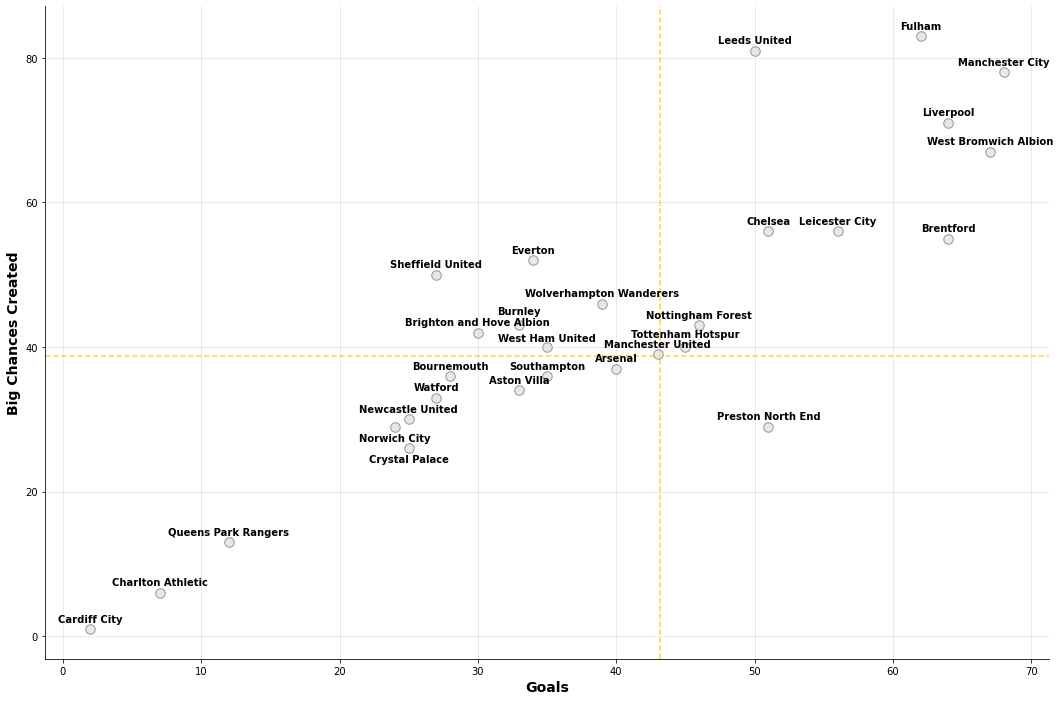

In [100]:
fig, ax = plt.subplots(figsize=(18,12))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#add gridlines to main viz
ax.grid(zorder=1,color="grey",alpha=0.2)

# Add plots
ax.scatter(goal, bcc, s=90, facecolors='#E3E3E3', edgecolors='grey', zorder=2, alpha=0.8)

# Plot the average line
ax.axvline(bcc.mean(), color='#FFCD00', linestyle='dashed', linewidth=1.5,zorder=1, alpha=0.8, label="Average")
ax.axhline(goal.mean(), color='#FFCD00', linestyle='dashed', linewidth=1.5,zorder=1, alpha=0.8)

dx, dy = goal, bcc
for i in range(len(team)):
    if team[i] == "Crystal Palace":
        ax.text(dx[i],dy[i]-1.9,team[i],ha="center",color="black",zorder=6,fontweight="bold")
    elif team[i] == "Norwich City":
        ax.text(dx[i],dy[i]-2,team[i],ha="center",color="black",zorder=6,fontweight="bold")
    elif team[i] == "West Ham United":
        ax.text(dx[i],dy[i]+0.8,team[i],ha="center",color="black",zorder=6,fontweight="bold")
    elif team[i] == "Burnley":
        ax.text(dx[i],dy[i]+1.5,team[i],ha="center",color="black",zorder=6,fontweight="bold")
    elif team[i] == "Tottenham Hotspur":
        ax.text(dx[i],dy[i]+1.3,team[i],ha="center",color="black",zorder=6,fontweight="bold")
    else:
        ax.text(dx[i],dy[i]+1,team[i],ha="center",color="black",zorder=6, fontweight="bold")

# Label axis/plot
ax.set_ylabel("Big Chances Created",fontsize=14,fontweight="bold",color="black")
ax.set_xlabel("Goals",fontsize=14,fontweight="bold",color="black")

plt.savefig('big_chance_create_goals',transparent=True);